1.Loading the DATASET

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score,
                             f1_score, roc_curve, auc)
from sklearn.multiclass import OneVsRestClassifier

# Load the dataset
file_path = '/content/health diagnosis.csv'
data = pd.read_csv(file_path)
print(data)
print(data.info())



      Reference ID  Report Year           Diagnosis Category  \
0       MN16-22639         2016                   Infectious   
1       MN16-22638         2016                       Mental   
2       MN16-22637         2016              Autism Spectrum   
3       EI16-22636         2016       Prevention/Good Health   
4        EI06-5319         2006          Cardiac/Circulatory   
...            ...          ...                          ...   
19240       MN01-7         2001              Trauma/Injuries   
19241       MN01-6         2001                   Infectious   
19242       MN01-5         2001  Orthopedic/ Musculoskeletal   
19243       MN01-4         2001  Orthopedic/ Musculoskeletal   
19244       EI01-3         2001                       Cancer   

           Diagnosis Sub Category                         Treatment Category  \
0                       Hepatitis                Pharmacy/Prescription Drugs   
1                 Eating Disorder                    Mental Health Trea

In [ ]:
# Drop unnecessary columns
data_cleaned = data.drop(['Report Year', 'Reference ID', 'Age Range','Patient Gender'], axis=1)

# Encode the target variable 'Level'
label_encoder = LabelEncoder()
data_cleaned['Type'] = label_encoder.fit_transform(data_cleaned['Type'])  # Low = 0, Medium = 1, High = 2
print(data_cleaned)
print(data_cleaned.info())

                Diagnosis Category      Diagnosis Sub Category  \
0                       Infectious                   Hepatitis   
1                           Mental             Eating Disorder   
2                  Autism Spectrum              Autism-PDD-NOS   
3           Prevention/Good Health                         NaN   
4              Cardiac/Circulatory                         NaN   
...                            ...                         ...   
19240              Trauma/Injuries               Gunshot Wound   
19241                   Infectious  Onychomycosis/ Nail Fungus   
19242  Orthopedic/ Musculoskeletal                       Other   
19243  Orthopedic/ Musculoskeletal                   Back Pain   
19244                       Cancer                 Lung Cancer   

                              Treatment Category  \
0                    Pharmacy/Prescription Drugs   
1                        Mental Health Treatment   
2                       Autism Related Treatment   

In [ ]:
# Check the column names in the DataFrame
print("Columns in the dataset:", data_cleaned.columns)


Columns in the dataset: Index(['Diagnosis Category', 'Diagnosis Sub Category', 'Treatment Category',
       'Treatment Sub Category', 'Determination', 'Type', 'Findings'],
      dtype='object')


In [ ]:
# Display the first few rows of the DataFrame
print(data_cleaned.head())


       Diagnosis Category Diagnosis Sub Category  \
0              Infectious              Hepatitis   
1                  Mental        Eating Disorder   
2         Autism Spectrum         Autism-PDD-NOS   
3  Prevention/Good Health                    NaN   
4     Cardiac/Circulatory                    NaN   

                          Treatment Category  \
0                Pharmacy/Prescription Drugs   
1                    Mental Health Treatment   
2                   Autism Related Treatment   
3  Diagnostic Imaging, Screening and Testing   
4                            Cardio Vascular   

                     Treatment Sub Category  \
0                               Anti-virals   
1  Residential Treatment Center - Admission   
2                            Speech Therapy   
3                               Mammography   
4                                       NaN   

                        Determination  Type  \
0  Overturned Decision of Health Plan     1   
1      Upheld Decisio

DATA PREPROCESSING:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/health diagnosis.csv')
df.head()

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
0,MN16-22639,2016,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male,Nature of Statutory Criteria/Case Summary: An ...
1,MN16-22638,2016,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female,Nature of Statutory Criteria/Case Summary: An...
2,MN16-22637,2016,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female,Nature of Statutory Criteria/Case Summary: Th...
3,EI16-22636,2016,Prevention/Good Health,NaN,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female,Nature of Statutory Criteria/Case Summary: An ...
4,EI06-5319,2006,Cardiac/Circulatory,NaN,Cardio Vascular,NaN,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Male,Physician 1: The patient is a 62-year-old male...


In [ ]:
df.isnull().sum()

,0
Reference ID,0
Report Year,0
Diagnosis Category,59
Diagnosis Sub Category,1904
Treatment Category,450
Treatment Sub Category,1268
Determination,0
Type,0
Age Range,1210
Patient Gender,1210


In [ ]:
# Fill null values with the mean of the column
for column in df.columns:
  if df[column].isnull().any():
    # Check if the column is numeric before calculating the mean
    if pd.api.types.is_numeric_dtype(df[column]):
      df[column].fillna(df[column].mean(), inplace=True)
    else:
      # Handle non-numeric columns (e.g., fill with mode or a specific value)
      # For example, fill with the most frequent value (mode)
      df[column].fillna(df[column].mode()[0], inplace=True)
      # Alternatively, you can fill with a specific string like 'Unknown'
      # df[column].fillna('Unknown', inplace=True)

# Verify that null values are filled
df.isnull().sum()
df.head()

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
0,MN16-22639,2016,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male,Nature of Statutory Criteria/Case Summary: An ...
1,MN16-22638,2016,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female,Nature of Statutory Criteria/Case Summary: An...
2,MN16-22637,2016,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female,Nature of Statutory Criteria/Case Summary: Th...
3,EI16-22636,2016,Prevention/Good Health,Other,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female,Nature of Statutory Criteria/Case Summary: An ...
4,EI06-5319,2006,Cardiac/Circulatory,Other,Cardio Vascular,Other,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Male,Physician 1: The patient is a 62-year-old male...


In [ ]:
# prompt: fill null values with median

# Fill null values with the median of the column
for column in df.columns:
  if df[column].isnull().any():
    # Check if the column is numeric before calculating the median
    if pd.api.types.is_numeric_dtype(df[column]):
      df[column].fillna(df[column].median(), inplace=True)
    else:
      # Handle non-numeric columns (e.g., fill with mode or a specific value)
      # For example, fill with the most frequent value (mode)
      df[column].fillna(df[column].mode()[0], inplace=True)
      # Alternatively, you can fill with a specific string like 'Unknown'
      # df[column].fillna('Unknown', inplace=True)

# Verify that null values are filled
df.isnull().sum()
df.head()

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
0,MN16-22639,2016,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male,Nature of Statutory Criteria/Case Summary: An ...
1,MN16-22638,2016,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female,Nature of Statutory Criteria/Case Summary: An...
2,MN16-22637,2016,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female,Nature of Statutory Criteria/Case Summary: Th...
3,EI16-22636,2016,Prevention/Good Health,Other,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female,Nature of Statutory Criteria/Case Summary: An ...
4,EI06-5319,2006,Cardiac/Circulatory,Other,Cardio Vascular,Other,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Male,Physician 1: The patient is a 62-year-old male...


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.config', 'health diagnosis.csv', 'sample_data']


In [ ]:
import pandas as pd
dataset = pd.read_csv("/content/health diagnosis.csv")

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.shape

(19245, 11)

In [ ]:
dataset.head(5)

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
0,MN16-22639,2016,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male,Nature of Statutory Criteria/Case Summary: An ...
1,MN16-22638,2016,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female,Nature of Statutory Criteria/Case Summary: An...
2,MN16-22637,2016,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female,Nature of Statutory Criteria/Case Summary: Th...
3,EI16-22636,2016,Prevention/Good Health,NaN,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female,Nature of Statutory Criteria/Case Summary: An ...
4,EI06-5319,2006,Cardiac/Circulatory,NaN,Cardio Vascular,NaN,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Male,Physician 1: The patient is a 62-year-old male...


In [ ]:
dataset.describe()

,Report Year
count,19245.000000
mean,2009.662977
std,4.272045
min,2001.000000
25%,2007.000000
50%,2010.000000
75%,2014.000000
max,2016.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19245 entries, 0 to 19244
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reference ID            19245 non-null  object
 1   Report Year             19245 non-null  int64 
 2   Diagnosis Category      19186 non-null  object
 3   Diagnosis Sub Category  17341 non-null  object
 4   Treatment Category      18795 non-null  object
 5   Treatment Sub Category  17977 non-null  object
 6   Determination           19245 non-null  object
 7   Type                    19245 non-null  object
 8   Age Range               18035 non-null  object
 9   Patient Gender          18035 non-null  object
 10  Findings                19225 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.6+ MB


In [ ]:
info = ["age","1: male, 0: female",
"resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"]
for i in range(len(info)):
  pass # You likely want to do something with info here.
["oldpeak = ST depression induced by exercise relative to rest",
"number of major vessels (0-3) colored by flourosopy",
"chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect",
" maximum heart rate achieved","exercise induced angina",
"the slope of the peak exercise ST segment"]
print(dataset.columns[i]+":\t\t\t"+info[i])

Treatment Sub Category:			resting electrocardiographic results (values 0,1,2)


In [ ]:
dataset["Type"].describe()

,Type
count,19245
unique,3
top,Medical Necessity
freq,13588


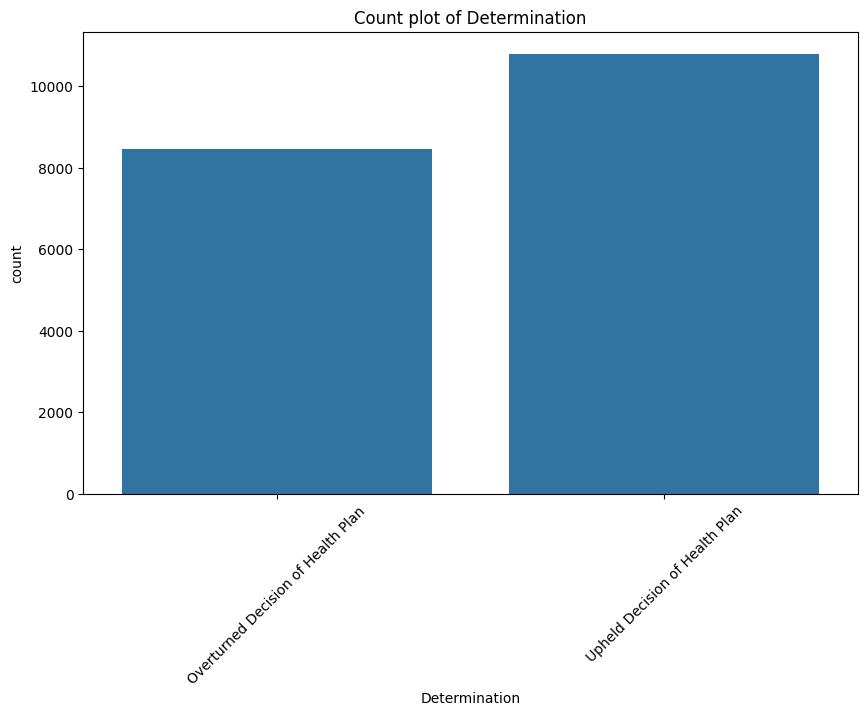

Determination
Upheld Decision of Health Plan        10788
Overturned Decision of Health Plan     8457
Name: count, dtype: int64


In [ ]:
import pandas as pd # Import the pandas library
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual file name)
dataset = pd.read_csv('/content/health diagnosis.csv')

y = dataset["Determination"]
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title("Count plot of Determination")
plt.xticks(rotation=45)
plt.show()
target_temp = dataset["Determination"].value_counts()
print(target_temp)

In [ ]:

total_count = len(dataset)
percentage_upheld = round(target_temp["Upheld Decision of Health Plan"] * 100 / total_count, 2)
percentage_overturned = round(target_temp["Overturned Decision of Health Plan"] * 100 / total_count, 2)
print("Percentage of patients with Upheld Decision of Health Plan: " + str(percentage_upheld) + "%")
print("Percentage of patients with Overturned Decision of Health Plan: " + str(percentage_overturned) + "%")



Percentage of patients with Upheld Decision of Health Plan: 56.06%
Percentage of patients with Overturned Decision of Health Plan: 43.94%


In [ ]:
dataset["Patient Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

<Axes: xlabel='Patient Gender', ylabel='Determination'>

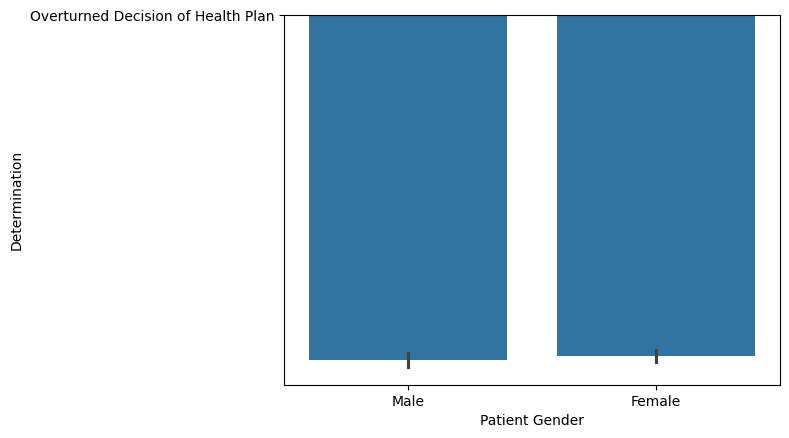

In [ ]:
sns.barplot(x=dataset["Patient Gender"], y=y)

In [ ]:

unique_values_diagnosis_category = dataset["Diagnosis Category"].unique()
print("Unique values in 'Diagnosis Category':", unique_values_diagnosis_category)
unique_values_treatment_category = dataset["Treatment Category"].unique()
print("Unique values in 'Treatment Category':", unique_values_treatment_category)


Unique values in 'Diagnosis Category': ['Infectious' 'Mental' 'Autism Spectrum' 'Prevention/Good Health'
 'Cardiac/Circulatory' 'OB-Gyn/ Pregnancy'
 'Digestive System/ Gastrointestinal' 'Orthopedic/ Musculoskeletal'
 'Central Nervous System/ Neuromuscular' 'Endocrine/ Metabolic'
 'Pediatrics' 'Chronic Pain' 'Respiratory System' 'Cancer'
 'Morbid Obesity' 'Ears, Nose, Throat' 'Post Surgical Complication'
 'Immunologic' 'Skin' 'Not Applicable' 'Foot' 'Dental' 'Blood Related'
 'Genetic' 'Genitourinary/ Kidney' 'Vision' 'Trauma/Injuries' nan
 'Organ Failure' 'Alcohol and Drug Addiction']
Unique values in 'Treatment Category': ['Pharmacy/Prescription Drugs' 'Mental Health Treatment'
 'Autism Related Treatment' 'Diagnostic Imaging, Screening and Testing'
 'Cardio Vascular' 'Durable Medical Equipment'
 'Diagnostic/Physician Evaluation' 'Orthopedic' 'Emergency/Urgent Care'
 'General Surgery' 'Acute Medical Services - Outpatient' 'Not Applicable'
 'Pain Management' 'Cancer Treatment' 'Reconstru

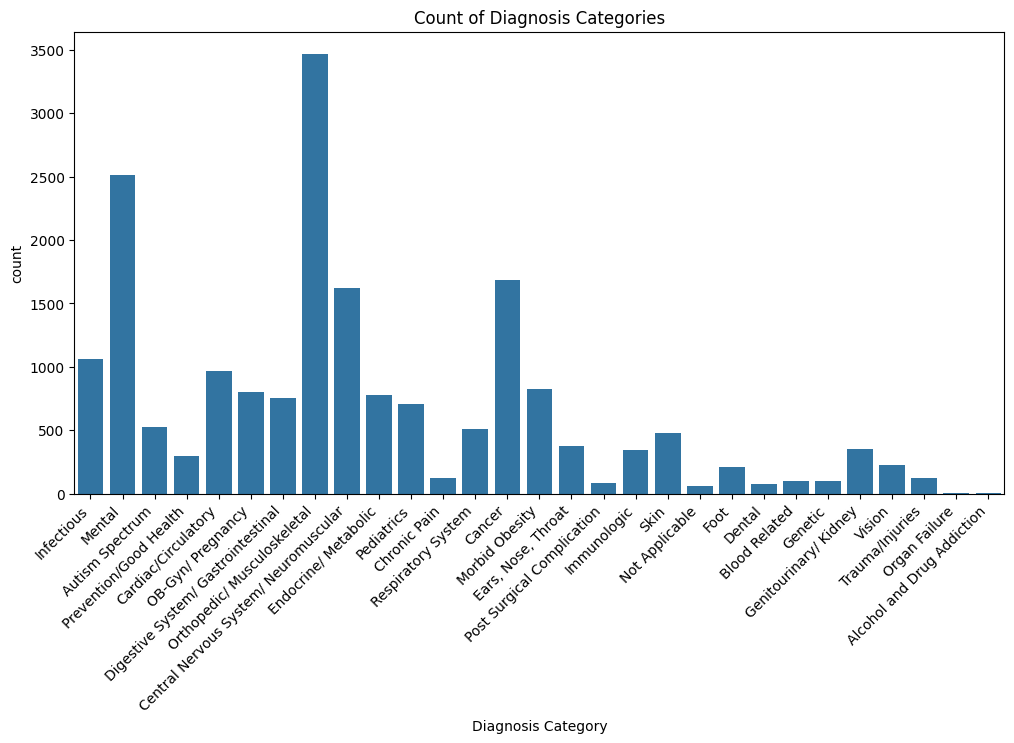

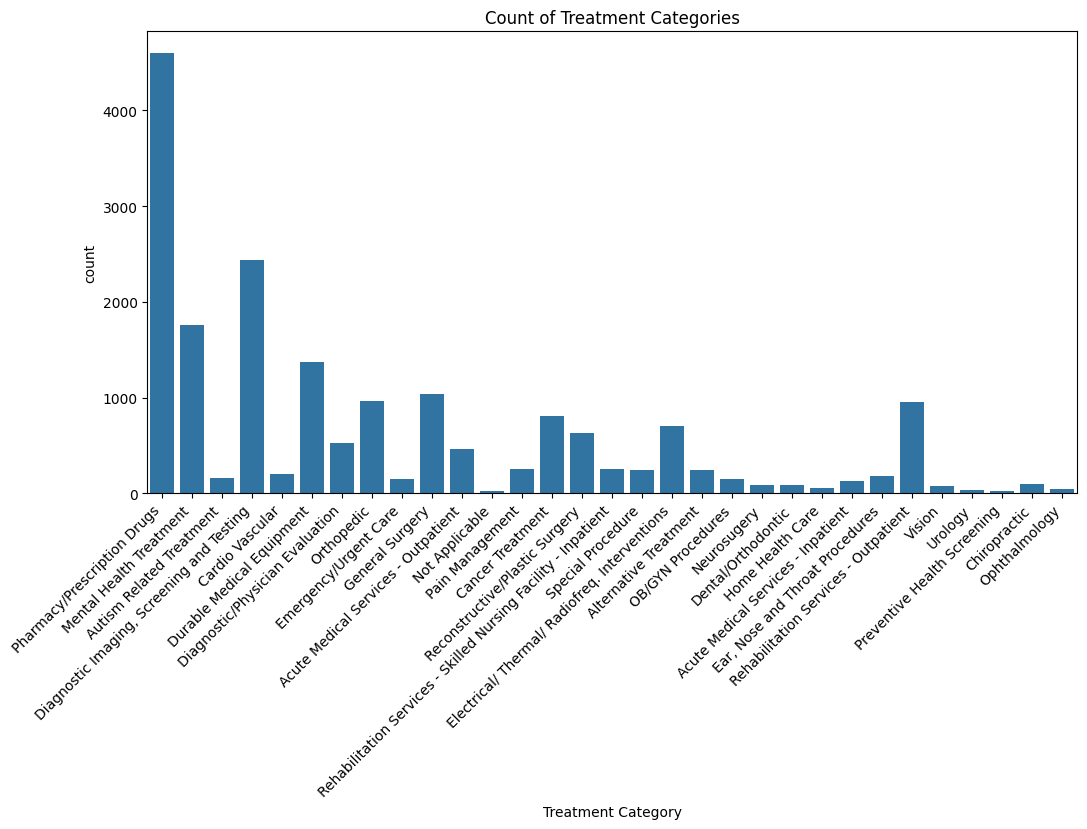

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(x='Diagnosis Category', data=dataset)
plt.title('Count of Diagnosis Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Treatment Category', data=dataset)
plt.title('Count of Treatment Categories')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
report_year_description = dataset["Report Year"].describe()
print("Statistical description of 'Report Year':\n", report_year_description)
age_range_description = dataset["Age Range"].describe()
print("\nDescription of 'Age Range':\n", age_range_description)


Statistical description of 'Report Year':
 count    19245.000000
mean      2009.662977
std          4.272045
min       2001.000000
25%       2007.000000
50%       2010.000000
75%       2014.000000
max       2016.000000
Name: Report Year, dtype: float64

Description of 'Age Range':
 count     18035
unique        7
top       51-64
freq       6612
Name: Age Range, dtype: object


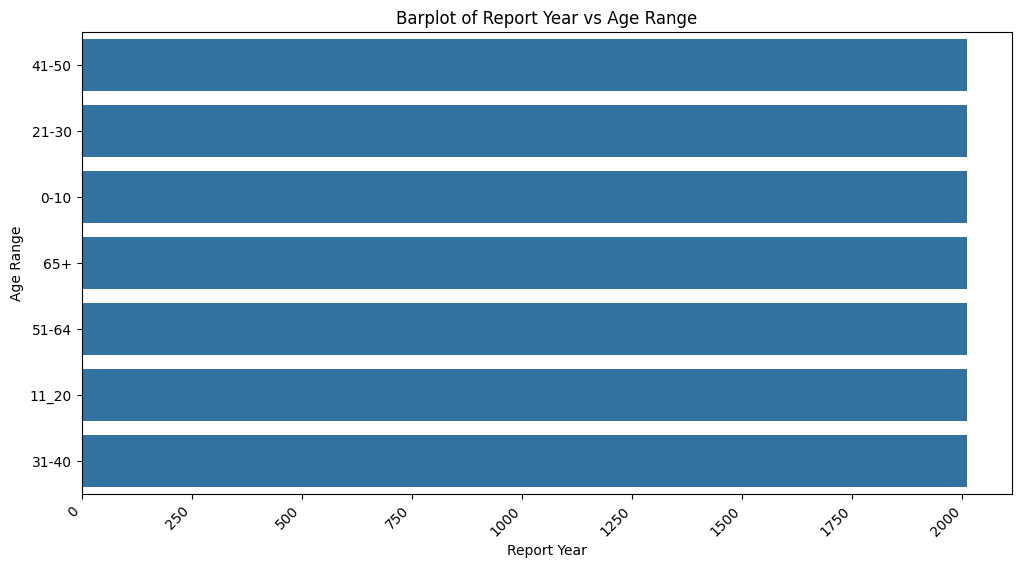

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(x='Report Year', y='Age Range', data=dataset)
plt.title('Barplot of Report Year vs Age Range')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
unique_values_patient_gender = dataset["Patient Gender"].unique()
print("Unique values in 'Patient Gender':", unique_values_patient_gender)
unique_values_diagnosis_sub_category = dataset["Diagnosis Sub Category"].unique()
print("Unique values in 'Diagnosis Sub Category':", unique_values_diagnosis_sub_category)


Unique values in 'Patient Gender': ['Male' 'Female' nan]
Unique values in 'Diagnosis Sub Category': ['Hepatitis' 'Eating Disorder' 'Autism-PDD-NOS' nan
 'Female Breast Disorder' 'Other' 'Fracture' 'Depression - Severe'
 'Diabetes' 'Lipid Storage Disease' 'Thyroid Problems' 'Hypertension'
 'Multiple Sclerosis' 'Hormone Deficiency'
 'Developmental Delays/ Cognitive' 'Back Pain' 'Hip Problem' 'Asthma'
 'Breast Cancer' 'Ovarian Cancer' 'Scoliosis' 'Vertebral Disc Problem'
 'Deformities' 'Throat Infection' 'Anxiety' 'GERDs/ Reflux Disorders'
 'Sleep Apnea' 'Substance Abuse/ Addiction' 'Headache/Migraine'
 'Shoulder Problem' 'Muscle Spasms' 'Psoriasis' 'Skin Cancer'
 'Fibromyalgia' 'High Risk Suicide' 'Osteoporosis' 'Bipolar Disorder'
 'Joint Problem' 'Knee Problem' 'Mole' 'Cardiac Problem' 'Osteoarthritis'
 'Brain Tumor' 'Eczema' 'Heart Attack' 'Schizophrenia' 'Migraine'
 'Psychosis' 'Overbite/ Underbite' 'Throat/ Neck Cancer'
 "Alzheimer's Diease" 'AIDS/HIV' 'Fibroids'
 'Coronary Artery Di

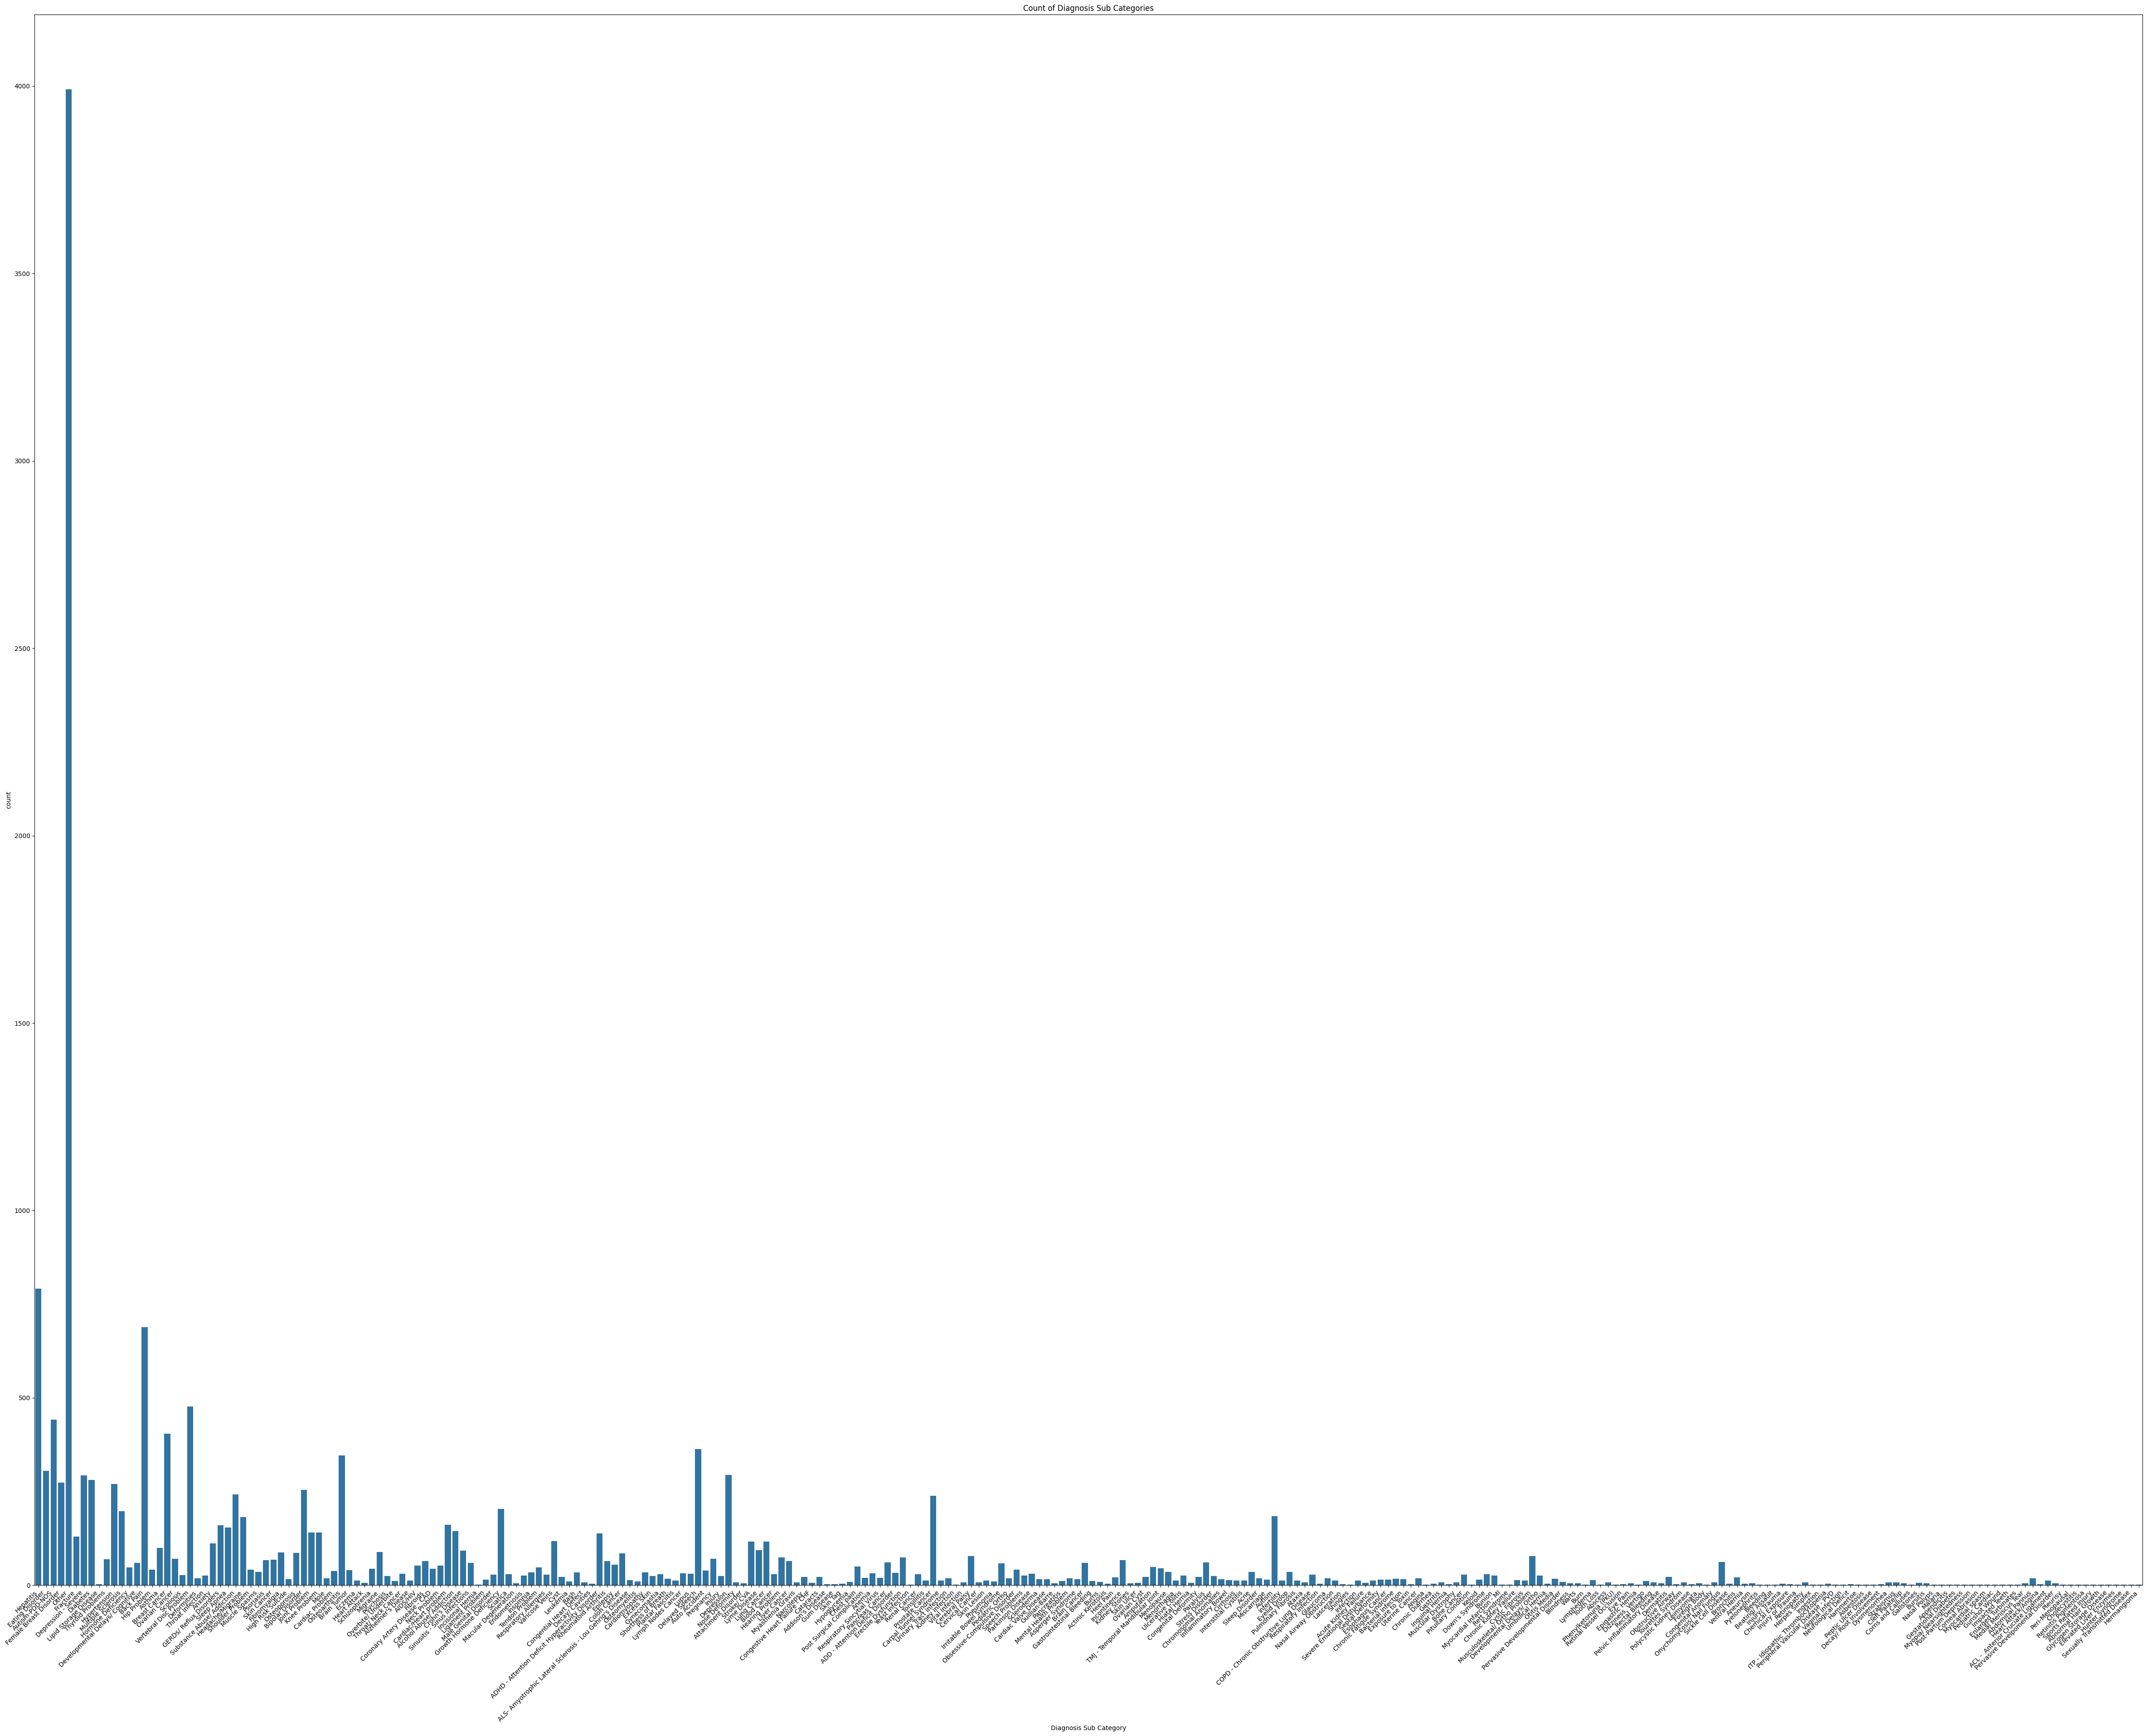

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(60,45))
sns.countplot(x='Diagnosis Sub Category', data=dataset)
plt.title('Count of Diagnosis Sub Categories')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
unique_values_diagnosis_category = dataset["Diagnosis Category"].unique()
print("Unique values in 'Diagnosis Category':", unique_values_diagnosis_category)
unique_values_type = dataset["Type"].unique()
print("Unique values in 'Type':", unique_values_type)


Unique values in 'Diagnosis Category': ['Infectious' 'Mental' 'Autism Spectrum' 'Prevention/Good Health'
 'Cardiac/Circulatory' 'OB-Gyn/ Pregnancy'
 'Digestive System/ Gastrointestinal' 'Orthopedic/ Musculoskeletal'
 'Central Nervous System/ Neuromuscular' 'Endocrine/ Metabolic'
 'Pediatrics' 'Chronic Pain' 'Respiratory System' 'Cancer'
 'Morbid Obesity' 'Ears, Nose, Throat' 'Post Surgical Complication'
 'Immunologic' 'Skin' 'Not Applicable' 'Foot' 'Dental' 'Blood Related'
 'Genetic' 'Genitourinary/ Kidney' 'Vision' 'Trauma/Injuries' nan
 'Organ Failure' 'Alcohol and Drug Addiction']
Unique values in 'Type': ['Medical Necessity' 'Experimental/Investigational' 'Urgent Care']


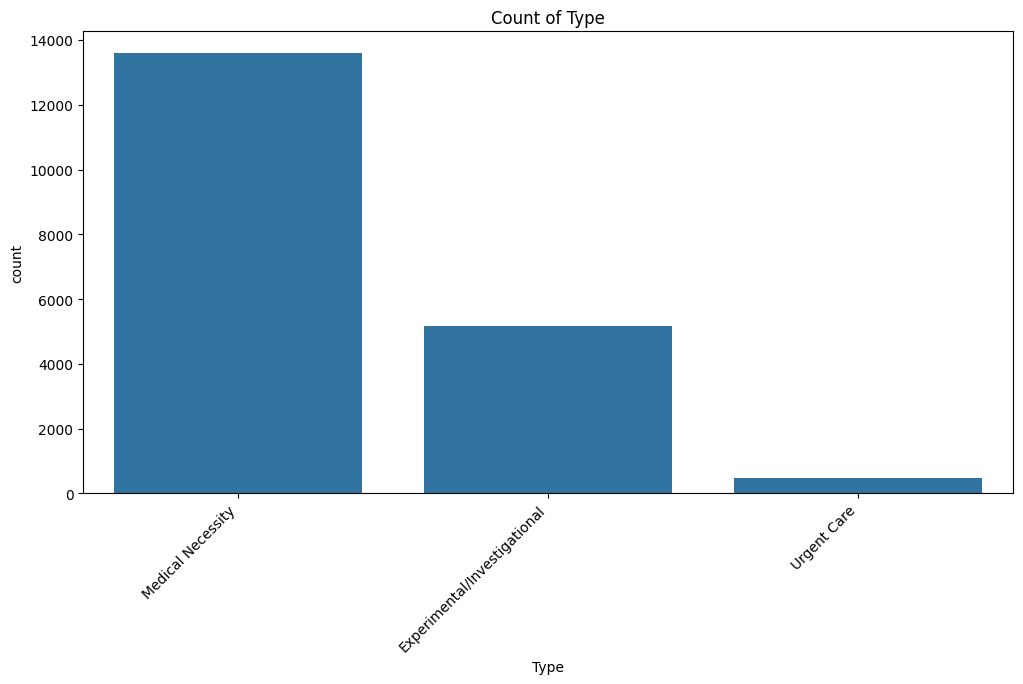

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(x='Type', data=dataset)
plt.title('Count of Type')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
dataset_cleaned = dataset.dropna(subset=["Determination"])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset_cleaned["Determination"])
X = dataset_cleaned[["Report Year", "Age Range"]].dropna()
y = y[:X.shape[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (14428, 2)
X_test shape: (3607, 2)
y_train shape: (14428,)
y_test shape: (3607,)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
dataset_cleaned = dataset.dropna(subset=["Determination"])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset_cleaned["Determination"])
X = dataset_cleaned[["Report Year", "Age Range"]].fillna("Unknown")
X = pd.get_dummies(X, columns=["Age Range"], drop_first=True)

y = y[:X.shape[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))


Model Accuracy: 59.78%


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(3849,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 59.86 %


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
Y_pred_nb = nb.predict(X_test)

In [ ]:
Y_pred_nb.shape

(3849,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 53.88 %


In [ ]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)
Y_pred_svm = sv.predict(X_test)

In [ ]:
Y_pred_svm.shape


(3849,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 59.86 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape

(3849,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 55.42 %


Model Accuracy: 60.98%

Classification Report:
                                     precision    recall  f1-score   support

Overturned Decision of Health Plan       0.59      0.33      0.42      1675
    Upheld Decision of Health Plan       0.62      0.83      0.71      2174

                          accuracy                           0.61      3849
                         macro avg       0.60      0.58      0.56      3849
                      weighted avg       0.61      0.61      0.58      3849



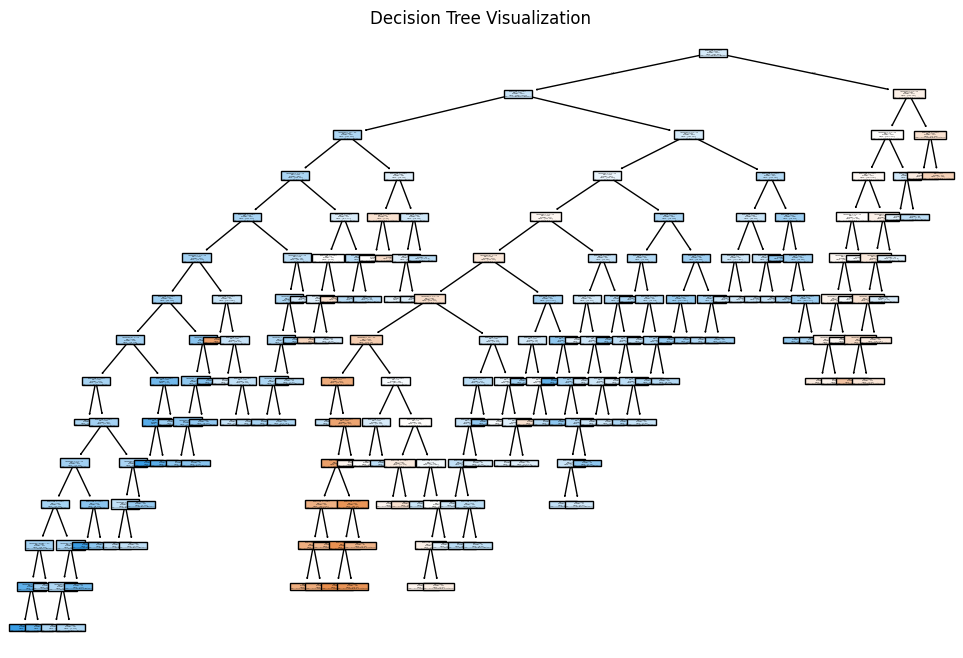

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
dataset_cleaned = dataset.dropna(subset=["Determination"])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset_cleaned["Determination"])
X = dataset_cleaned[["Report Year", "Age Range"]].fillna("Unknown")
X = pd.get_dummies(X, columns=["Age Range"], drop_first=True)
y = y[:X.shape[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
score_dt = round(accuracy_score(y_pred,y_test)*100,2) # Use y_pred which was calculated in the decision tree code
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 60.98 %


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
dataset_cleaned = dataset.dropna(subset=["Determination"])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset_cleaned["Determination"])
X = dataset_cleaned[["Report Year", "Age Range"]].fillna("Unknown")
X = pd.get_dummies(X, columns=["Age Range"], drop_first=True)
y = y[:X.shape[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Model Accuracy: 61.21%

Classification Report:
                                     precision    recall  f1-score   support

Overturned Decision of Health Plan       0.60      0.32      0.42      1675
    Upheld Decision of Health Plan       0.62      0.83      0.71      2174

                          accuracy                           0.61      3849
                         macro avg       0.61      0.58      0.56      3849
                      weighted avg       0.61      0.61      0.58      3849



In [ ]:
score_rf = round(accuracy_score(y_pred,y_test)*100,2) # Change Y_pred_rf to y_pred
print("The accuracy score achieved using Random Forest is: ", (score_rf), "%") # Change the model name to Random Forest for clarity
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %") # Change the model name to Random Forest for clarity

The accuracy score achieved using Random Forest is:  61.21 %
The accuracy score achieved using Random Forest is: 61.21 %


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
Y_pred_xgb = xgb_model.predict(X_test)
Y_pred_xgb.shape

(3849,)

In [ ]:
score_dt = round(accuracy_score(y_pred,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 61.21 %


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
print(X_train.shape)
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model.fit(X_train,y_train,epochs=50)

(15396, 8)
Epoch 1/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4848 - loss: 89.6774
Epoch 2/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5210 - loss: 0.7626
Epoch 3/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5200 - loss: 0.7947
Epoch 4/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5225 - loss: 0.7474
Epoch 5/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5261 - loss: 0.7502
Epoch 6/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5176 - loss: 0.7745
Epoch 7/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5252 - loss: 0.8292
Epoch 8/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5176 - loss: 0.7508
Epoch 9/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5298 - loss: 0.8256
Epoch 10/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5203 - loss: 0.7740
Epoch 11/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5358 - loss: 0.7365
Epoch 12/50
482/482 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
X_test = X_test.astype('float32')
Y_pred_nn = model.predict(X_test)
Y_pred_nn.shape

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


(3849, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,y_test)*100,2)
print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 59.86 %


In [ ]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import accuracy_score
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
Y_pred_xgb = model_xgb.predict(X_test)
score_xgb = round(accuracy_score(Y_pred_xgb, y_test) * 100, 2)

scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree", "Random Forest", "XGBoost", "Neural Network"] # Added the missing algorithm names
for i in range(len(algorithms)):
  print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 59.86 %
The accuracy score achieved using Naive Bayes is: 53.88 %
The accuracy score achieved using Support Vector Machine is: 59.86 %
The accuracy score achieved using K-Nearest Neighbors is: 55.42 %
The accuracy score achieved using Decision Tree is: 61.21 %
The accuracy score achieved using Random Forest is: 61.21 %
The accuracy score achieved using XGBoost is: 61.21 %
The accuracy score achieved using Neural Network is: 59.86 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

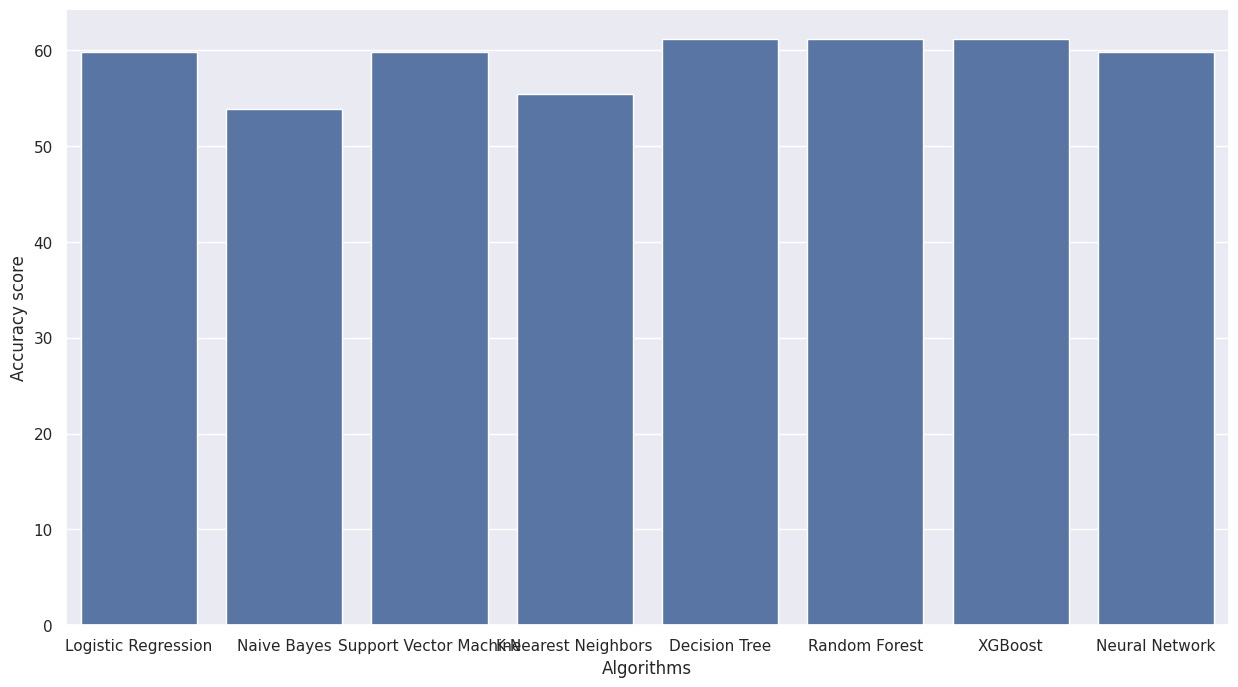

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms,y=scores)

FEATURE SELECTION

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables (except the target variable, for instance 'Findings')
df_encoded = df.apply(LabelEncoder().fit_transform)

# Split the dataset into features (X) and target (y)
X = df_encoded.drop('Findings', axis=1)  # Features
y = df_encoded['Findings']  # Target (example - you can choose any other column as the target variable)
print((X,y))

(       Reference ID  Report Year  Diagnosis Category  Diagnosis Sub Category  \
0             18759           15                  15                     122   
1             18758           15                  16                      86   
2             18757           15                   1                      26   
3              5162           15                  24                     193   
4               824            5                   4                     193   
...             ...          ...                 ...                     ...   
19240          5540            0                  27                     114   
19241          5508            0                  15                     189   
19242          5463            0                  21                     193   
19243          5446            0                  21                      28   
19244             2            0                   3                     158   

       Treatment Category  Treatment S

Feature Selection Methods a. Correlation Matrix (Filter Method)bold text

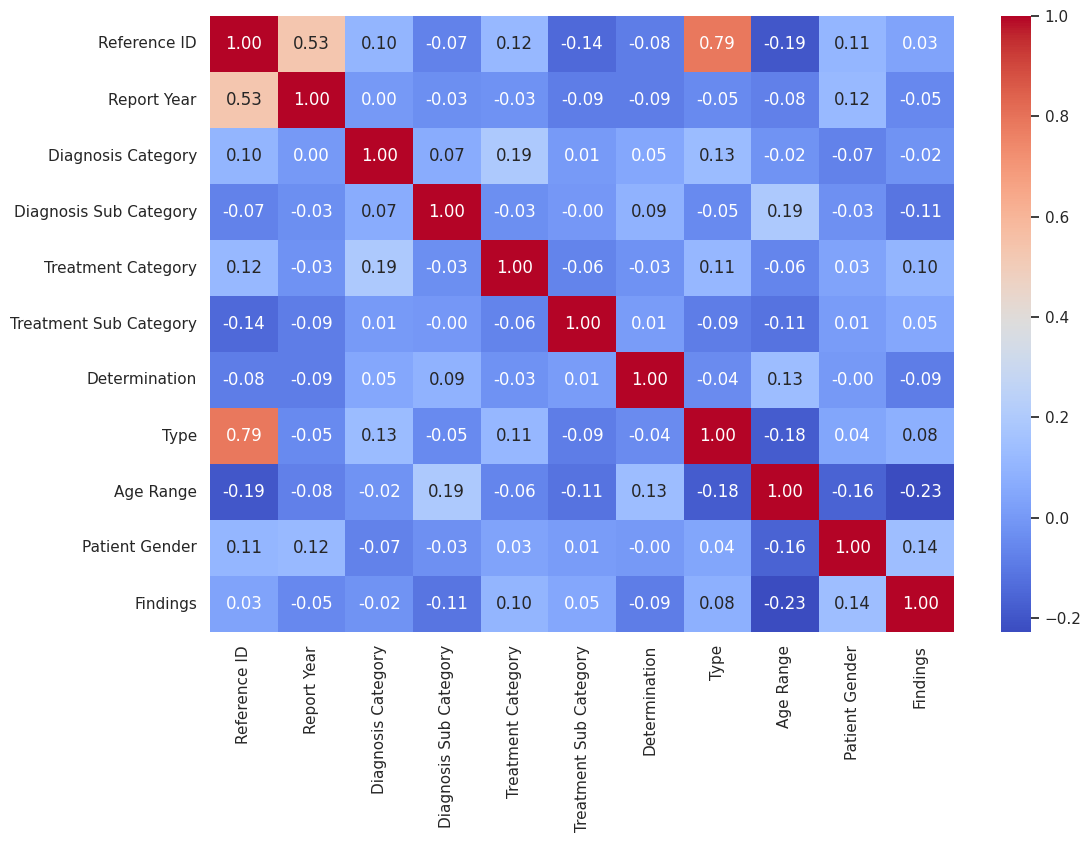

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# If you want to drop features with high correlation (above a threshold, e.g., 0.8):
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
X_filtered = X.drop(to_drop, axis=1)


b. Chi-Square Test (For Categorical Data)


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Normalize features to fit the requirements of the chi2 test
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply Chi-Square Test
chi2_selector = SelectKBest(chi2, k=10)  # Select top 10 features
X_kbest = chi2_selector.fit_transform(X_scaled, y)

# Get the names of the selected features
selected_features = X.columns[chi2_selector.get_support()]
print("Top 10 features selected by Chi-Square test:", selected_features)


Top 10 features selected by Chi-Square test: Index(['Reference ID', 'Report Year', 'Diagnosis Category',
       'Diagnosis Sub Category', 'Treatment Category',
       'Treatment Sub Category', 'Determination', 'Type', 'Age Range',
       'Patient Gender'],
      dtype='object')


**RESULT**


In [ ]:
import pandas as pd
df = pd.read_csv('/content/health diagnosis.csv')
print(df.values)


[['MN16-22639' 2016 'Infectious' ... '41-50' 'Male'
  'Nature of Statutory Criteria/Case Summary: An enrollee has requested Harvoni for treatment of his hepatitis C virus genotype 1a.  Findings:  The physician reviewer found that according to the most recent joint guidelines issued by the American Association for the Study of Liver Diseases (AASLD) and the Infectious Diseases Society of America (IDSA), all patients with chronic hepatitis C should be treated except those with limited life expectancy due to non-liver-related conditions. This applies regardless of fibrosis stage or viral load, and advanced fibrosis is not required for treatment. Per guidelines, treatment-naïve genotype 1 patients should be treated with Harvoni. Patients with viral load of less than 6,000,000 IU/mL can be treated for eight weeks. These guideline recommendations are based on multiple randomized clinical trials (Kowdley, et al; Afdhal, et al). Moreover, the AASLD and IDSA guidelines cite data showing reduced

Dataset preview:
   Reference ID  Report Year      Diagnosis Category Diagnosis Sub Category  \
0   MN16-22639         2016              Infectious              Hepatitis   
1   MN16-22638         2016                  Mental        Eating Disorder   
2   MN16-22637         2016         Autism Spectrum         Autism-PDD-NOS   
3   EI16-22636         2016  Prevention/Good Health                    NaN   
4    EI06-5319         2006     Cardiac/Circulatory                    NaN   

                          Treatment Category  \
0                Pharmacy/Prescription Drugs   
1                    Mental Health Treatment   
2                   Autism Related Treatment   
3  Diagnostic Imaging, Screening and Testing   
4                            Cardio Vascular   

                     Treatment Sub Category  \
0                               Anti-virals   
1  Residential Treatment Center - Admission   
2                            Speech Therapy   
3                               Mamm

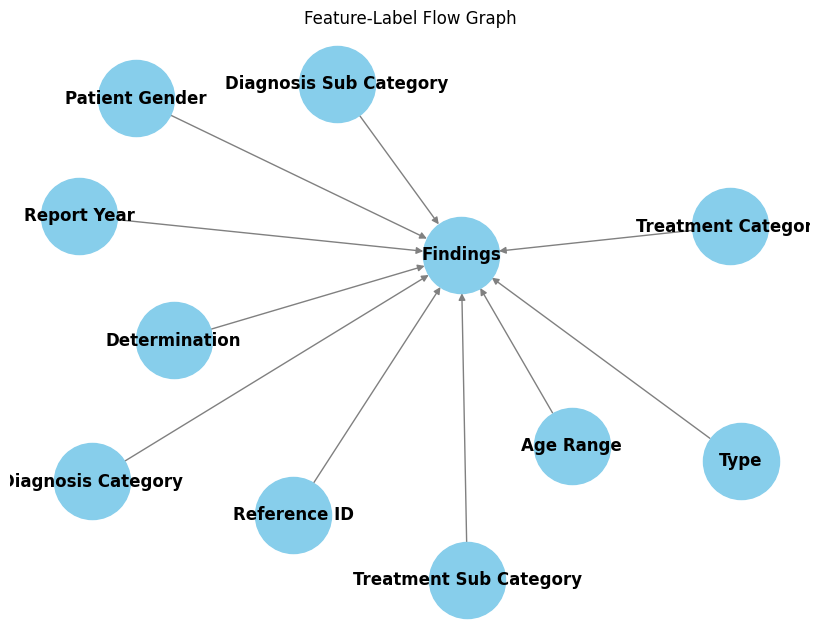

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
file_path = '/content/health diagnosis.csv'
data = pd.read_csv(file_path)

print("Dataset preview:\n", data.head())
def create_flow_graph(data):
    G = nx.DiGraph()
    features = data.columns[:-1]
    label = data.columns[-1]
    for feature in features:
        G.add_node(feature)
    G.add_node(label, color='red')
    for feature in features:
        G.add_edge(feature, label)

    return G
flow_graph = create_flow_graph(data)
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(flow_graph)
nx.draw(flow_graph, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=12, font_weight='bold', edge_color='gray')
plt.title("Feature-Label Flow Graph")
plt.show()


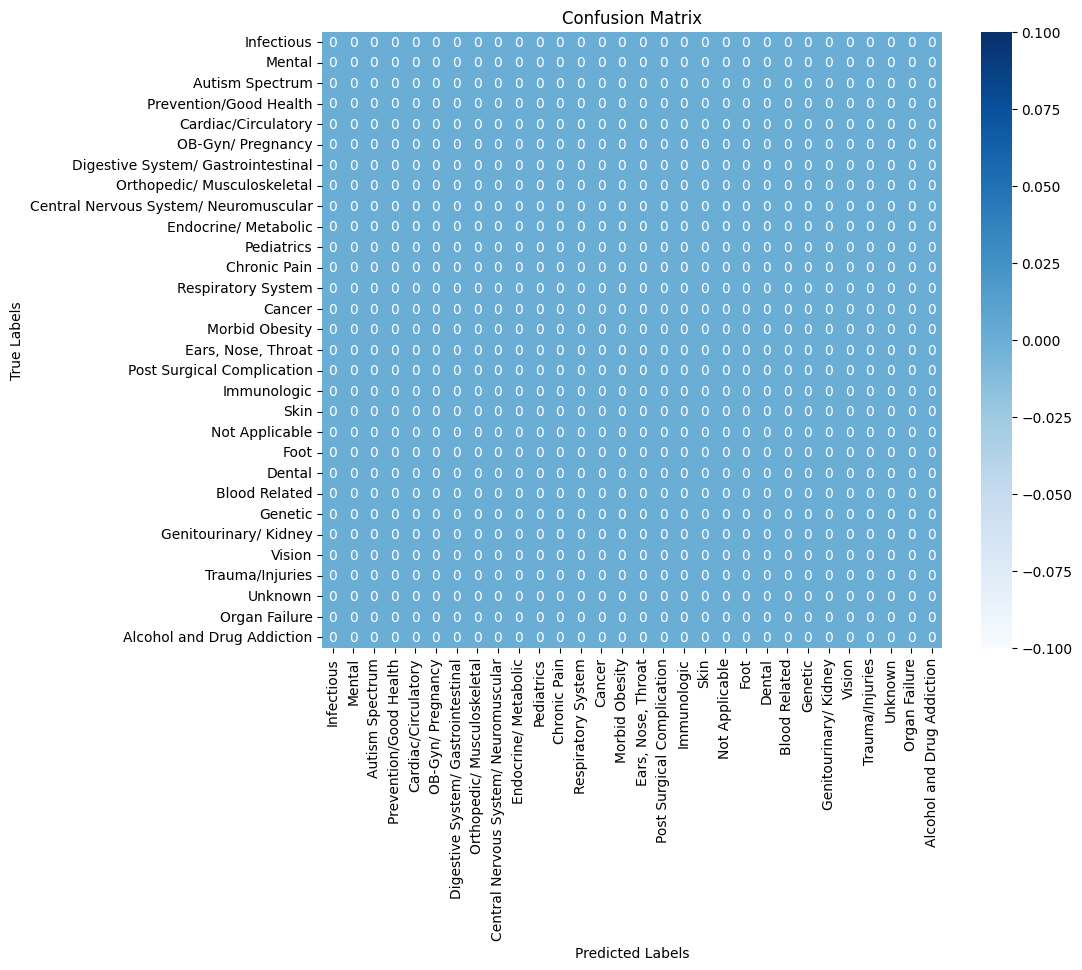

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
file_path = '/content/health diagnosis.csv'
df = pd.read_csv(file_path)
y_true = df['Diagnosis Category'].fillna('Unknown')
y_pred = df['Determination'].fillna('Unknown')
cm = confusion_matrix(y_true, y_pred, labels=y_true.unique())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_true.unique(), yticklabels=y_true.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Accuracy: 0.11
Precision: 0.02
Recall: 0.11
F1 Score: 0.03


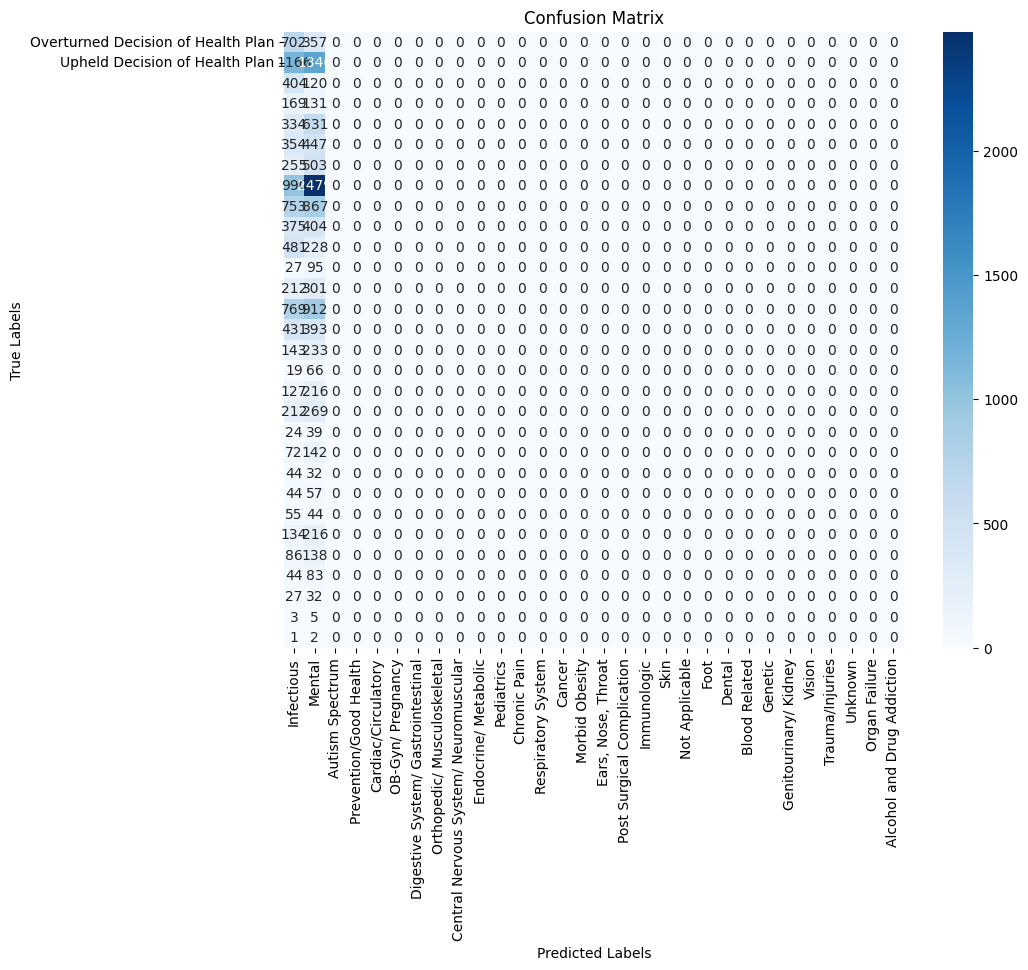

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
file_path = '/content/health diagnosis.csv'
df = pd.read_csv(file_path)
y_true = df['Diagnosis Category'].fillna('Unknown')
y_pred = df['Determination'].fillna('Unknown')
y_true_encoded, _ = pd.factorize(y_true)
y_pred_encoded, _ = pd.factorize(y_pred)

cm = confusion_matrix(y_true_encoded, y_pred_encoded)

accuracy = accuracy_score(y_true_encoded, y_pred_encoded)
precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=pd.factorize(y_true)[1],
            yticklabels=pd.factorize(y_pred)[1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


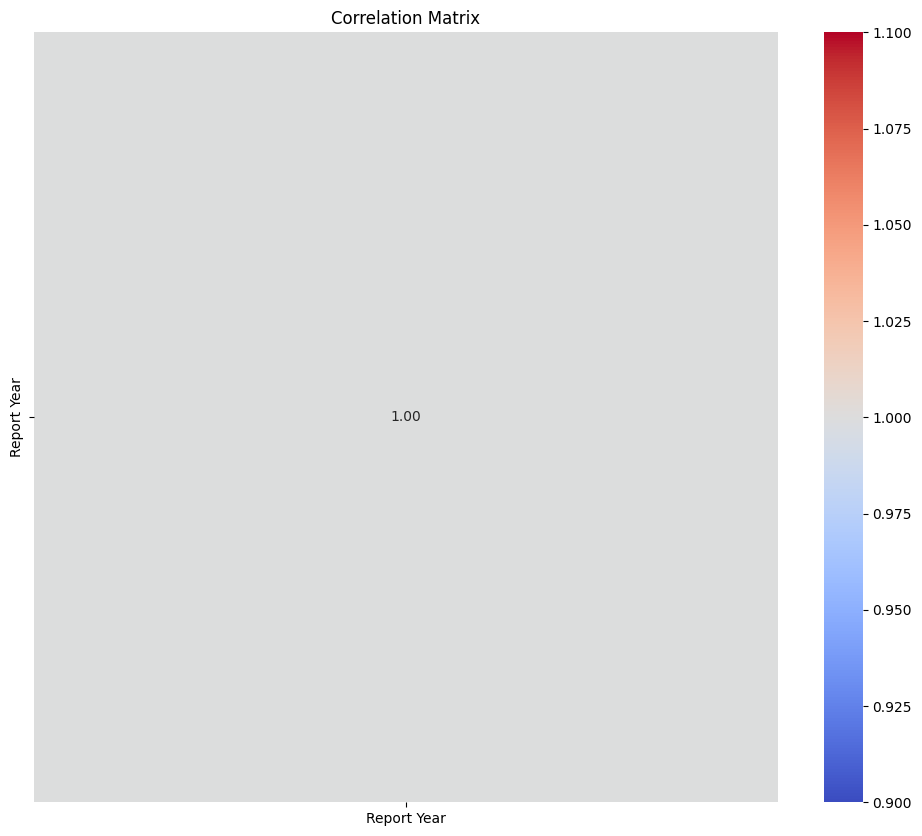

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


y_true = df['Diagnosis Category'].fillna('Unknown')
y_pred = df['Determination'].fillna('Unknown')
y_true_encoded, _ = pd.factorize(y_true)
y_pred_encoded, _ = pd.factorize(y_pred)

r_squared = r2_score(y_true_encoded, y_pred_encoded)

mse = mean_squared_error(y_true_encoded, y_pred_encoded)

mae = mean_absolute_error(y_true_encoded, y_pred_encoded)
rmse = np.sqrt(mse)

print(f"R-squared: {r_squared:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R-squared: -1.59
MSE: 99.75
MAE: 7.86
RMSE: 9.99


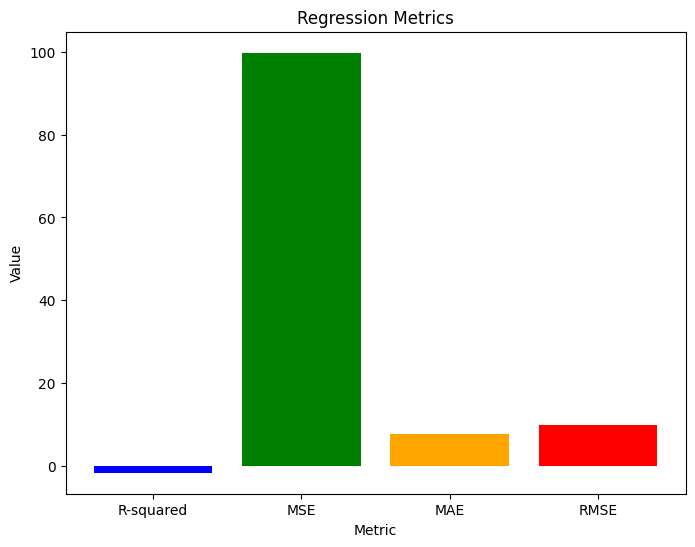

In [ ]:
import matplotlib.pyplot as plt

metrics = ['R-squared', 'MSE', 'MAE', 'RMSE']
values = [r_squared, mse, mae, rmse]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Regression Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

X = df[['Reference ID', 'Findings', 'Determination']]
y = df['Diagnosis Category']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

for col in X.select_dtypes(include=['object', 'datetime']).columns:
    X_train[col] = X_train[col].factorize()[0]
    X_test[col] = X_test[col].factorize()[0]


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r_squared:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R-squared: -0.01
MSE: 57.52
MAE: 6.61
RMSE: 7.58


In [ ]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming X and y_encoded are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Encoding categorical columns
for col in X.select_dtypes(include=['object', 'datetime']).columns:
    X_train[col] = X_train[col].factorize()[0]
    X_test[col] = X_test[col].factorize()[0]

# Model evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return r_squared, mse, mae, rmse

# Models dictionary with SVR added
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR()  # SVR added here
}

# Dictionary to store the results
results = {}

# Training and evaluating models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    r_squared, mse, mae, rmse = evaluate_model(model, X_test, y_test)
    results[model_name] = {"R-squared": r_squared, "MSE": mse, "MAE": mae, "RMSE": rmse}

# Print the results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.2f}")



Linear Regression:
R-squared: -0.01
MSE: 57.52
MAE: 6.61
RMSE: 7.58

Lasso Regression:
R-squared: -0.00
MSE: 57.09
MAE: 6.59
RMSE: 7.56

Ridge Regression:
R-squared: -0.01
MSE: 57.52
MAE: 6.61
RMSE: 7.58

Decision Tree:
R-squared: -1.06
MSE: 117.74
MAE: 8.78
RMSE: 10.85

Random Forest:
R-squared: -0.41
MSE: 80.68
MAE: 7.48
RMSE: 8.98

Support Vector Regression:
R-squared: -0.05
MSE: 60.12
MAE: 6.35
RMSE: 7.75


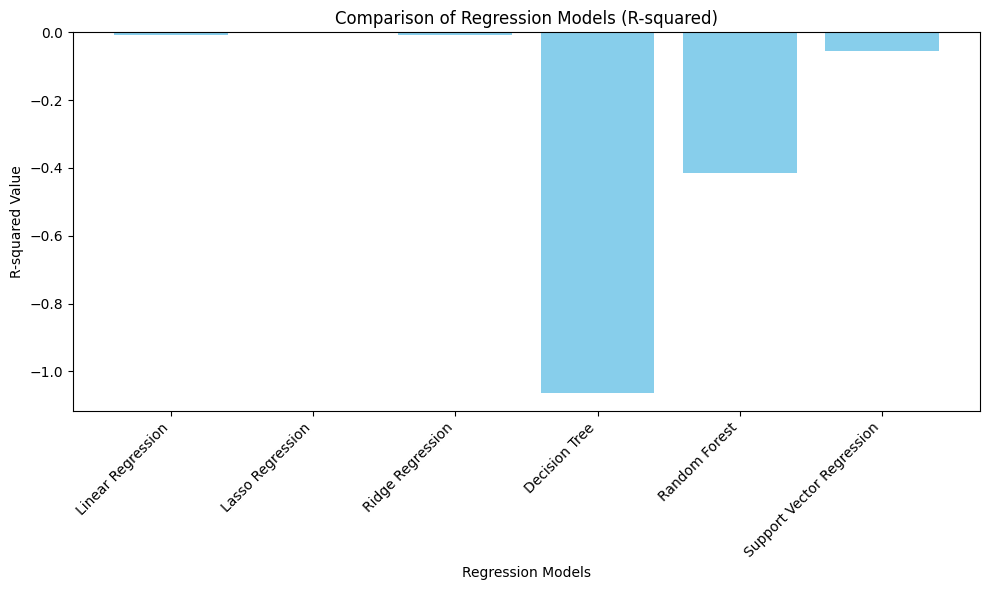

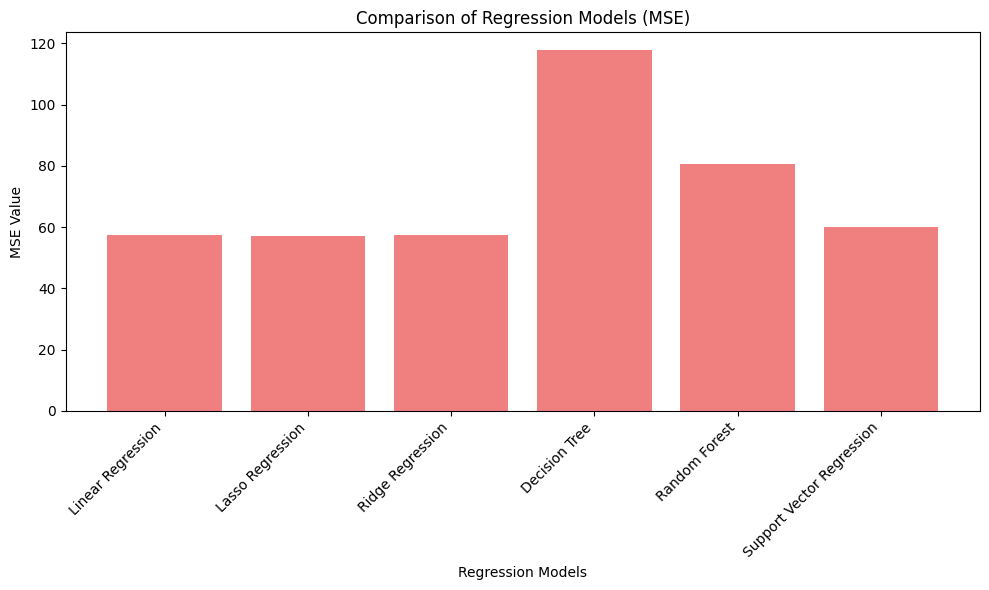

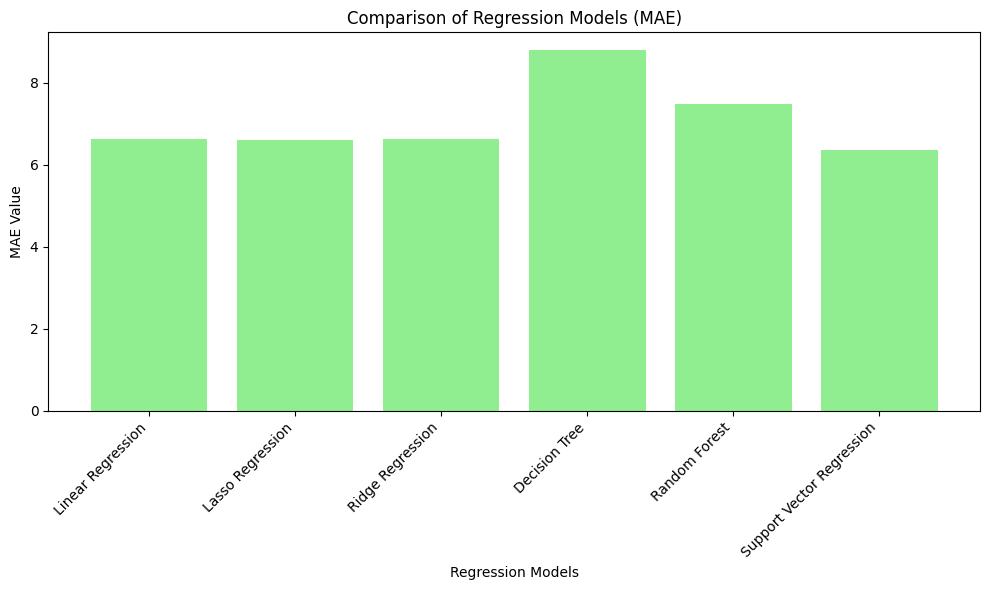

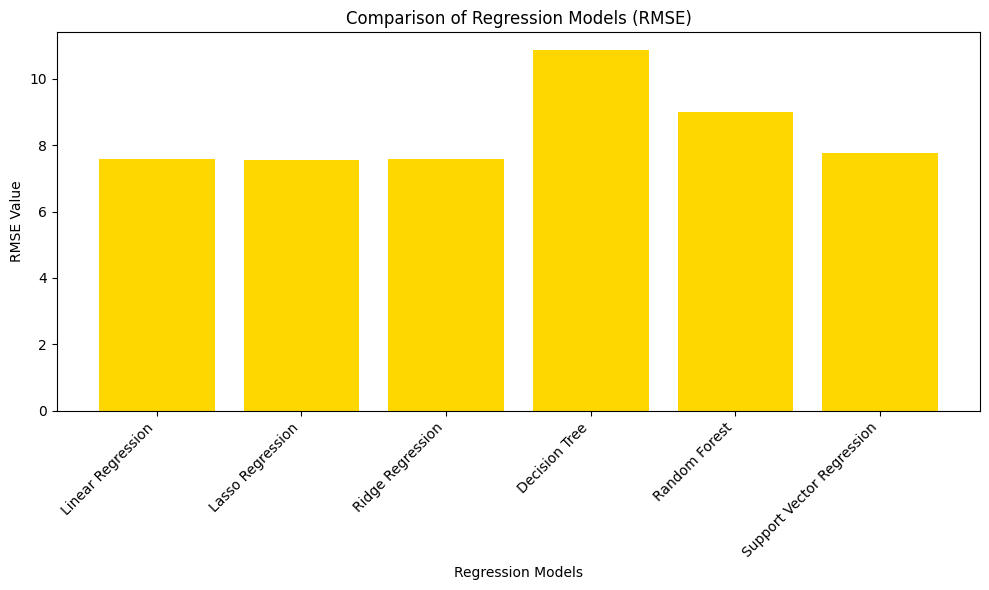

In [ ]:
# prompt: represent comparission of regression model using above one

import matplotlib.pyplot as plt

# Assuming 'results' dictionary contains the performance metrics for each model

# Create a bar chart to compare R-squared values
r_squared_values = [results[model]["R-squared"] for model in results]
model_names = list(results.keys())

plt.figure(figsize=(10, 6))
plt.bar(model_names, r_squared_values, color='skyblue')
plt.title('Comparison of Regression Models (R-squared)')
plt.xlabel('Regression Models')
plt.ylabel('R-squared Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a bar chart to compare MSE values
mse_values = [results[model]["MSE"] for model in results]

plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color='lightcoral')
plt.title('Comparison of Regression Models (MSE)')
plt.xlabel('Regression Models')
plt.ylabel('MSE Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a bar chart to compare MAE values
mae_values = [results[model]["MAE"] for model in results]

plt.figure(figsize=(10, 6))
plt.bar(model_names, mae_values, color='lightgreen')
plt.title('Comparison of Regression Models (MAE)')
plt.xlabel('Regression Models')
plt.ylabel('MAE Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a bar chart to compare RMSE values
rmse_values = [results[model]["RMSE"] for model in results]

plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='gold')
plt.title('Comparison of Regression Models (RMSE)')
plt.xlabel('Regression Models')
plt.ylabel('RMSE Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
def get_treatment_details(diagnosis, diagnosis_sub_category):

    filtered_data = data[(data['Diagnosis Category'] == diagnosis) &
                         (data['Diagnosis Sub Category'] == diagnosis_sub_category)]

    if not filtered_data.empty:
        for index, row in filtered_data.iterrows():
            print(f"Reference ID: {row['Reference ID']}")
            print(f"Diagnosis Category: {row['Diagnosis Category']}")
            print(f"Diagnosis Sub Category: {row['Diagnosis Sub Category']}")
            print(f"Treatment Category: {row['Treatment Category']}")
            print(f"Treatment Sub Category: {row['Treatment Sub Category']}\n")
    else:
        print("No matching diagnosis found.")
diagnosis_input = input("Enter Diagnosis Category: ")
diagnosis_sub_input = input("Enter Diagnosis Sub Category: ")
get_treatment_details(diagnosis_input, diagnosis_sub_input)


Enter Diagnosis Category: cancer
Enter Diagnosis Sub Category: overian cancer
No matching diagnosis found.


In [ ]:
def get_treatment_details(diagnosis, diagnosis_sub_category):
    # Filter the dataset based on Diagnosis Category and Diagnosis Sub Category
    filtered_data = data[(data['Diagnosis Category'] == diagnosis) &
                         (data['Diagnosis Sub Category'] == diagnosis_sub_category)]

    # Check if any matching rows are found
    if not filtered_data.empty:
        for index, row in filtered_data.iterrows():
            # Print details for each matching record
            print(f"Reference ID: {row['Reference ID']}")
            print(f"Diagnosis Category: {row['Diagnosis Category']}")
            print(f"Diagnosis Sub Category: {row['Diagnosis Sub Category']}")
            print(f"Treatment Category: {row['Treatment Category']}")
            print(f"Treatment Sub Category: {row['Treatment Sub Category']}")
            print(f"Determination: {row['Determination']}")
            print(f"Findings: {row['Findings']}\n")
    else:
        print("No matching diagnosis found.")

# Example usage
diagnosis_input = input("Enter Diagnosis Category: ")
diagnosis_sub_input = input("Enter Diagnosis Sub Category: ")
get_treatment_details(diagnosis_input, diagnosis_sub_input)


Enter Diagnosis Category: cancer
Enter Diagnosis Sub Category: ovarian cancer
No matching diagnosis found.


In [ ]:
# prompt: give me a code for getting a table for performance metrixs of the proposed model

import pandas as pd

# Assuming 'results' dictionary is already defined with model performance metrics
# (as in your previous code).

# Create a DataFrame from the results dictionary
performance_df = pd.DataFrame.from_dict(results, orient='index')

# Display the table
print(performance_df)

                           R-squared         MSE       MAE       RMSE
Linear Regression          -0.008050   57.517206  6.614926   7.584010
Lasso Regression           -0.000582   57.091123  6.591283   7.555867
Ridge Regression           -0.008047   57.517056  6.614920   7.584000
Decision Tree              -1.063566  117.742790  8.783061  10.850935
Random Forest              -0.413975   80.678482  7.484186   8.982120
Support Vector Regression  -0.053664   60.119876  6.350589   7.753701
